<a href="https://colab.research.google.com/github/vishnudas-raveendran/PGP-AIML/blob/master/ComputerVision/Project1/CV_project1_Plant_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle==1.5.8
from google.colab import files
files.upload()

     |████████████████████████████████| 59 kB 3.6 MB/s 


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnudasraveendran","key":"0a5e252c7dad2b9570d41043dd08a414"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries    3KB  2022-01-15 07:06:09           3292        103  1.0              
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                       3GB  2022-02-05 20:51:56            897         88  0.88235295       
yasserh/wine-quality-dataset                                Wine Quality Dataset                              21KB  2022-01-15 19:15:11           3284        127  1.0              
majyhain/height-of-male-and-female-by-country-2022          Height of Male and Female by Countr

In [3]:
!kaggle competitions download -c "plant-seedlings-classification"

 98% 1.66G/1.69G [00:13<00:00, 239MB/s]
100% 1.69G/1.69G [00:13<00:00, 133MB/s]


In [4]:
!unzip plant-seedlings-classification.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/test/ad12382d4.png  
  inflating: data/test/adb7a032c.png  
  inflating: data/test/ae90f2827.png  
  inflating: data/test/aecfaed64.png  
  inflating: data/test/aee6fa3df.png  
  inflating: data/test/af45e222a.png  
  inflating: data/test/afa446484.png  
  inflating: data/test/afcf6abd5.png  
  inflating: data/test/b026bf8ca.png  
  inflating: data/test/b03397525.png  
  inflating: data/test/b0acaff4a.png  
  inflating: data/test/b130a0632.png  
  inflating: data/test/b145ba9d4.png  
  inflating: data/test/b1cd2a91e.png  
  inflating: data/test/b215531dd.png  
  inflating: data/test/b2706e2b3.png  
  inflating: data/test/b29339405.png  
  inflating: data/test/b30ab4659.png  
  inflating: data/test/b31292706.png  
  inflating: data/test/b341d0aab.png  
  inflating: data/test/b39c71707.png  
  inflating: data/test/b3d6fdb80.png  
  inflating: data/test/b3e08b037.png  
  inflating: data/test/b47691c08.png  
  inflating: 

In [5]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import  Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [6]:
from keras.preprocessing import image
## Step 1 is to read the files and create Train and test arrays
# Each label for the image is the folder name
X = []
y = []
imgCount = {}
for fname in os.listdir('data/train'):
  for imgName in os.listdir('data/train/'+fname):
    X.append(image.load_img("/".join(("data/train",fname,imgName)),color_mode='rgb', target_size=(128,128),interpolation='nearest'))
    y.append(fname);
    if fname in imgCount.keys():
      imgCount[fname] = imgCount[fname]+1
    else:
      imgCount[fname] = 1


In [7]:
print("Dataset_size \nTrain: "+str(len(X))+"\n Labels:"+str(len(y)))

Dataset_size 
Train: 4750
 Labels:4750


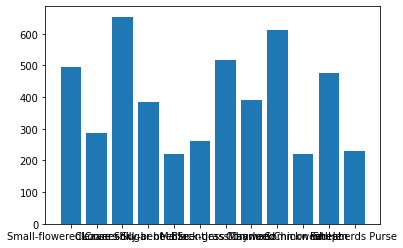

In [8]:
import seaborn as sns
plt.bar(range(len(imgCount)), list(imgCount.values()), align='center');
plt.xticks(range(len(imgCount)), list(imgCount.keys()));

In [9]:
print(imgCount)

{'Small-flowered Cranesbill': 496, 'Cleavers': 287, 'Loose Silky-bent': 654, 'Sugar beet': 385, 'Maize': 221, 'Black-grass': 263, 'Scentless Mayweed': 516, 'Charlock': 390, 'Common Chickweed': 611, 'Common wheat': 221, 'Fat Hen': 475, 'Shepherds Purse': 231}


In [10]:
## Split data into train/test
from sklearn.model_selection import train_test_split

X_train_img, X_test_img, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [11]:
print("Dataset size \nTrain: "+str(len(X_train_img))+"\nTest: "+str(len(X_test_img)))

Dataset size 
Train: 3800
Test: 950


Fat Hen


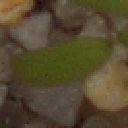

In [12]:
print(y_train[0])
X_train_img[0]

In [13]:
#Convert these imgs to numpy array
X_train = []
X_test = []
for img in X_train_img:
  X_train.append(np.array(img))
for img in X_test_img:
  X_test.append(np.array(img))

In [14]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [15]:
print(X_train[0].shape)
X_train[0]

(128, 128, 3)


array([[[157, 115,  65],
        [157, 115,  65],
        [158, 115,  67],
        ...,
        [ 85,  87,  32],
        [ 86,  88,  35],
        [ 86,  88,  35]],

       [[157, 115,  65],
        [157, 115,  65],
        [158, 115,  67],
        ...,
        [ 85,  87,  32],
        [ 86,  88,  35],
        [ 86,  88,  35]],

       [[160, 124,  79],
        [160, 124,  79],
        [159, 122,  77],
        ...,
        [ 83,  86,  30],
        [ 83,  85,  29],
        [ 83,  85,  29]],

       ...,

       [[ 53,  40,  28],
        [ 53,  40,  28],
        [ 52,  41,  29],
        ...,
        [ 76,  54,  35],
        [ 73,  51,  32],
        [ 73,  51,  32]],

       [[ 52,  40,  26],
        [ 52,  40,  26],
        [ 50,  38,  26],
        ...,
        [ 78,  56,  39],
        [ 75,  53,  37],
        [ 75,  53,  37]],

       [[ 52,  40,  26],
        [ 52,  40,  26],
        [ 50,  38,  26],
        ...,
        [ 78,  56,  39],
        [ 75,  53,  37],
        [ 75,  53,  37]]

In [16]:
# We have reduced the dimension of the image while loading the image to 128... lets now rescale it to values between 0 and 1. 
#This helps to compute faster
X_train = X_train / 255
X_test = X_test / 255

## Apply Supervised ML algorithms

In [17]:
# To apply ML algos we need to reduce the X_train from 4 dimensions to 1 dimension... Flatten operation can help do this
X_train_ML = []
X_test_ML = []
for i in range(0,500):    ##Taking the full 3800 records took up too much RAM while running SVM etc..So reduce size for ML training
  X_train_ML.append(X_train[i,:].flatten())

for i in range(0,150):
  X_test_ML.append(X_test[i,:].flatten())

y_train_ML = y_train[0:500]
y_test_ML = y_test[0:150]

In [18]:
print(str(len(X_train_ML))+" "+ str(X_train_ML[0].shape))
print(str(len(X_test_ML))+" "+str(X_test_ML[0].shape))

500 (49152,)
150 (49152,)


In [19]:
accuracy_scores = {}

In [20]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_ML, y_train_ML)

SVC()

In [21]:
svm_accuracy = clf.score(X_test_ML, y_test_ML)
print("SVM accuracy: "+ str(svm_accuracy))
accuracy_scores['svm'] = svm_accuracy;

SVM accuracy: 0.28


In [22]:
## Apply KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=len(imgCount))
knn.fit(X_train_ML, y_train_ML)

KNeighborsClassifier(n_neighbors=12)

In [23]:
knn_accuracy = knn.score(X_test_ML, y_test_ML)
print("KNN accuracy: "+ str(knn_accuracy))
accuracy_scores['knn'] = knn_accuracy

KNN accuracy: 0.17333333333333334


In [24]:
## Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_ML, y_train_ML)
mnb_accuracy = mnb.score(X_test_ML, y_test_ML)
print("Multinominal NB accuracy: "+ str(mnb_accuracy))
accuracy_scores['mnb'] = mnb_accuracy

Multinominal NB accuracy: 0.2866666666666667


In [25]:
## Decision Tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train_ML, y_train_ML)
dt_accuracy = dt.score(X_test_ML, y_test_ML)
print("Decision Tree Accuracy: "+ str(dt_accuracy))
accuracy_scores['dt'] = dt_accuracy

Decision Tree Accuracy: 0.21333333333333335


In [26]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=0.32,
                    hidden_layer_sizes=(5, 2), random_state=1)

mlp.fit(X_train_ML, y_train_ML)
mlp_accuracy = mlp.score(X_test_ML, y_test_ML)
print("MLP Accuracy: "+ str(mlp_accuracy))
accuracy_scores['Multilayer Perceptron'] = mlp_accuracy

MLP Accuracy: 0.21333333333333335


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Apply Neural Network

In [27]:
y_train_ML_1H = pd.get_dummies(y_train_ML)
y_test_ML_1H = pd.get_dummies(y_test_ML)


In [28]:
from sklearn.preprocessing import StandardScaler

X_train_ML_std = StandardScaler().fit_transform(X_train_ML) 
X_test_ML_std = StandardScaler().fit_transform(X_test_ML) 

In [29]:
model = Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=(X_train_ML[0].shape[0],)))  #49152
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(len(imgCount.keys()), activation="softmax"))  #12

In [30]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model.fit(x=X_train_ML_std, y=y_train_ML_1H, batch_size=20, epochs=5, validation_data=(X_test_ML_std, y_test_ML_1H))

Epoch 1/5
25/25 [==============================] - 10s 362ms/step - loss: 2.4520 - accuracy: 0.1380 - val_loss: 2.2734 - val_accuracy: 0.2533
Epoch 2/5
25/25 [==============================] - 9s 345ms/step - loss: 1.7364 - accuracy: 0.5260 - val_loss: 2.2035 - val_accuracy: 0.3200
Epoch 3/5
25/25 [==============================] - 9s 369ms/step - loss: 1.0494 - accuracy: 0.7720 - val_loss: 2.0785 - val_accuracy: 0.3200
Epoch 4/5
25/25 [==============================] - 9s 345ms/step - loss: 0.5669 - accuracy: 0.9100 - val_loss: 2.0900 - val_accuracy: 0.2800
Epoch 5/5
25/25 [==============================] - 9s 343ms/step - loss: 0.2566 - accuracy: 0.9760 - val_loss: 2.0644 - val_accuracy: 0.3467


In [31]:
score = model.evaluate(X_test_ML_std, y_test_ML_1H, verbose=0)
print("Neural Network Accuracy: "+ str(score[1]))
accuracy_scores['Neural Network'] = score[1]

Neural Network Accuracy: 0.3466666638851166


In [121]:
class_labels = list(set(y_train))

['Cleavers',
 'Charlock',
 'Fat Hen',
 'Sugar beet',
 'Maize',
 'Shepherds Purse',
 'Scentless Mayweed',
 'Black-grass',
 'Common Chickweed',
 'Small-flowered Cranesbill',
 'Common wheat',
 'Loose Silky-bent']

## Apply CNN

In [139]:
model = Sequential() 
#model.add(keras.layers.InputLayer(input_shape=(128,128,3)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3))) 
model.add(keras.layers.MaxPooling2D((2, 2))) 
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(keras.layers.MaxPooling2D((2, 2))) 
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2))) 
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2))) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

CNN = model
CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 128)     

In [140]:
X_train_mini = np.array(X_train[0:2000])   #Due to compute time and constraints
dummy = pd.get_dummies(y_train[0:2000])
class_labels = dummy.columns
y_train_mini = dummy.values
X_test_mini = np.array(X_test[0:500])
y_test_mini = pd.get_dummies(y_test[0:500], columns=class_labels).values

In [141]:
print(y_train_mini.shape)
y_train_mini[0]

(2000, 12)


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [142]:
print(X_train_mini.shape)
X_train_mini[0]

(2000, 128, 128, 3)


array([[[0.61568627, 0.45098039, 0.25490196],
        [0.61568627, 0.45098039, 0.25490196],
        [0.61960784, 0.45098039, 0.2627451 ],
        ...,
        [0.33333333, 0.34117647, 0.1254902 ],
        [0.3372549 , 0.34509804, 0.1372549 ],
        [0.3372549 , 0.34509804, 0.1372549 ]],

       [[0.61568627, 0.45098039, 0.25490196],
        [0.61568627, 0.45098039, 0.25490196],
        [0.61960784, 0.45098039, 0.2627451 ],
        ...,
        [0.33333333, 0.34117647, 0.1254902 ],
        [0.3372549 , 0.34509804, 0.1372549 ],
        [0.3372549 , 0.34509804, 0.1372549 ]],

       [[0.62745098, 0.48627451, 0.30980392],
        [0.62745098, 0.48627451, 0.30980392],
        [0.62352941, 0.47843137, 0.30196078],
        ...,
        [0.3254902 , 0.3372549 , 0.11764706],
        [0.3254902 , 0.33333333, 0.11372549],
        [0.3254902 , 0.33333333, 0.11372549]],

       ...,

       [[0.20784314, 0.15686275, 0.10980392],
        [0.20784314, 0.15686275, 0.10980392],
        [0.20392157, 0

In [143]:
CNN.fit(X_train_mini, y_train_mini, epochs = 10, validation_data = (X_test_mini, y_test_mini))  

Epoch 1/10
63/63 [==============================] - 60s 936ms/step - loss: 2.4517 - accuracy: 0.1245 - val_loss: 2.3918 - val_accuracy: 0.1360
Epoch 2/10
63/63 [==============================] - 58s 917ms/step - loss: 2.2337 - accuracy: 0.2260 - val_loss: 1.8718 - val_accuracy: 0.2980
Epoch 3/10
63/63 [==============================] - 57s 911ms/step - loss: 1.7011 - accuracy: 0.4130 - val_loss: 1.5461 - val_accuracy: 0.4280
Epoch 4/10
63/63 [==============================] - 57s 911ms/step - loss: 1.4816 - accuracy: 0.4775 - val_loss: 1.3192 - val_accuracy: 0.5720
Epoch 5/10
63/63 [==============================] - 57s 911ms/step - loss: 1.2216 - accuracy: 0.5785 - val_loss: 1.1251 - val_accuracy: 0.6320
Epoch 6/10
63/63 [==============================] - 57s 911ms/step - loss: 0.9652 - accuracy: 0.6620 - val_loss: 1.0853 - val_accuracy: 0.6160
Epoch 7/10
63/63 [==============================] - 57s 912ms/step - loss: 0.8191 - accuracy: 0.7200 - val_loss: 1.0036 - val_accuracy: 0.6780

In [144]:
score = CNN.evaluate(X_test_mini, y_test_mini, verbose=0)
print("CNN Accuracy: "+ str(score[1]))
accuracy_scores['CNN'] = score[1]

CNN Accuracy: 0.7080000042915344


In [145]:
accuracy_info = {'ML Model':list(accuracy_scores.keys()),
                  'Accuracy':list(accuracy_scores.values())}
accuracy_table = pd.DataFrame(accuracy_info)

In [146]:
accuracy_table

,ML Model,Accuracy
0,svm,0.280000
1,knn,0.173333
2,mnb,0.286667
3,dt,0.213333
4,Multilayer Perceptron,0.213333
5,Neural Network,0.346667
6,CNN,0.708000


### CNN is the best performing model with around 70 percent accuracy

In [147]:
# Save the model
import pickle
with open('plantSeedClassifier.model', 'wb') as files:
    pickle.dump(CNN, files)
print("model saved!!!")

INFO:tensorflow:Assets written to: ram://0ad50357-954f-4131-a453-61c420f27067/assets
model saved!!!


## Predict the class from a given image

In [148]:
with open('plantSeedClassifier.model' , 'rb') as f:
    lr = pickle.load(f)
    predict=[]
    predict.append(image.load_img("Predict.png",color_mode='rgb', target_size=(128,128),interpolation='nearest'))
   

    

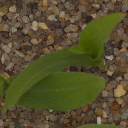

In [149]:
predict[0]

In [150]:
pred = np.array(predict[0])
pred = pred/255
print(pred.shape)

#print(x)

(128, 128, 3)


In [151]:
class_labels[np.argmax(CNN.predict(pred.reshape(1,128,128,3)))]

'Common Chickweed'

Misc

In [152]:
## Code to print HTML
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-

In [153]:
%cd '/content/drive/MyDrive/Colab Notebooks/'
!jupyter nbconvert --to html 'CV_project1_Plant_Identification.ipynb'

/content/drive/MyDrive/Colab Notebooks
[NbConvertApp] Converting notebook CV_project1_Plant_Identification.ipynb to html
[NbConvertApp] Writing 713787 bytes to CV_project1_Plant_Identification.html
